In [1]:
# importing all the necessry libraries for data preprocessing
import trimesh
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import pandas as pd
from scipy.spatial.distance import pdist, squareform

/Users/shrishmishra/Desktop/Mixar_Assignment/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# TASK 1

In [3]:
# I loaded ALL mesh files from the 8samples folder using trimesh library
# i used try and except method to determine our file is loaded perfectly
mesh_folder = "8samples"

# Get all .obj files and sort them
obj_files = sorted([f for f in os.listdir(mesh_folder) if f.endswith('.obj')])

meshes = {}

for filename in obj_files:
    mesh_file_path = os.path.join(mesh_folder, filename)
    
    try:
        mesh = trimesh.load(mesh_file_path)  # this will tell us if all the mesh are loaded perfectly or not
        meshes[filename] = mesh
        print(f"\n✓ Loaded: {filename}")
        print(f"  - Type: {type(mesh)}")
        print(f"  - Vertices: {len(mesh.vertices):,}")
        print(f"  - Faces: {len(mesh.faces):,}")
        print(f"  - Watertight: {mesh.is_watertight}")
        print(f"  - Bounds: {mesh.bounds.tolist()}")
        
    except Exception as e:
        print(f"\n✗ Failed to load {filename}: {e}")


✓ Loaded: branch.obj
  - Type: <class 'trimesh.base.Trimesh'>
  - Vertices: 2,767
  - Faces: 1,960
  - Watertight: False
  - Bounds: [[-0.851562, 0.0, -0.464844], [0.849609, 1.900391, 0.462891]]

✓ Loaded: cylinder.obj
  - Type: <class 'trimesh.base.Trimesh'>
  - Vertices: 192
  - Faces: 124
  - Watertight: False
  - Bounds: [[-1.0, -1.0, -1.0], [1.0, 1.0, 1.0]]

✓ Loaded: explosive.obj
  - Type: <class 'trimesh.base.Trimesh'>
  - Vertices: 2,812
  - Faces: 2,566
  - Watertight: False
  - Bounds: [[-0.199625, -0.0, -0.197126], [0.199625, 1.0, 0.197126]]

✓ Loaded: fence.obj
  - Type: <class 'trimesh.base.Trimesh'>
  - Vertices: 1,088
  - Faces: 684
  - Watertight: False
  - Bounds: [[-0.5, -0.0, -0.0225], [0.5, 0.84317, 0.0225]]

✓ Loaded: girl.obj
  - Type: <class 'trimesh.base.Trimesh'>
  - Vertices: 8,284
  - Faces: 8,475
  - Watertight: False
  - Bounds: [[-0.5, 0.0, -0.181411], [0.5, 0.904419, 0.181411]]

✓ Loaded: person.obj
  - Type: <class 'trimesh.base.Trimesh'>
  - Vertices:

In [4]:
# Now we will extract vertex (x,y,z) coordinates from all meshes and convert them to Numpy array
all_vertices = {}

for name, mesh in meshes.items():
    vertices = np.array(mesh.vertices)
    all_vertices[name] = vertices
    
# it will extract vertex cordianted from meshes and will save in the vertices variable in the form of 
#cylinder.obj:
#Shape: (192, 3)
#Number of vertices: 192
#Number of faces: 124
#First 3 vertices:
#[[ 0. -1. -1.]
#[ 0. -1. -1.]
#[ 0. -1. -1.]]

In [7]:
# We will Calculate and display statistics for ALL meshes including count, min, max, mean
# , standard deviation and range for each axis

print(" STATISTICS FOR ALL MESHES")


for name, mesh in meshes.items():
    vertices = all_vertices[name]
    
    # Statistics per axis
    x_coords = vertices[:, 0]
    y_coords = vertices[:, 1]
    z_coords = vertices[:, 2]

    print(f"\n")
    print(f" {name.upper()}:")

    
    print(f"\n Number of Vertices: {len(vertices):,}")
    print(f" Number of Faces: {len(mesh.faces):,}")
    print(f"\n")

    

    print(" VERTEX COORDINATE STATISTICS:")

    
    axes_names = ['X', 'Y', 'Z']
    coords_list = [x_coords, y_coords, z_coords]
    
    for axis, coord in zip(axes_names, coords_list):
        print(f"\n{axis}-Axis Statistics:")
        print(f"  Minimum:         {np.min(coord):>12.6f}")
        print(f"  Maximum:         {np.max(coord):>12.6f}")
        print(f"  Mean:            {np.mean(coord):>12.6f}")
        print(f"  Standard Dev:    {np.std(coord):>12.6f}")
        print(f"  Range:           {np.max(coord) - np.min(coord):>12.6f}")
    

print(f"\n")
print("SUMMARY:")

print(f"Total meshes processed: {len(meshes)}")
print(f"Total vertices across all meshes: {sum(len(v) for v in all_vertices.values()):,}")
print(f"Total faces across all meshes: {sum(len(m.faces) for m in meshes.values()):,}")


 STATISTICS FOR ALL MESHES


 BRANCH.OBJ:

 Number of Vertices: 2,767
 Number of Faces: 1,960


 VERTEX COORDINATE STATISTICS:

X-Axis Statistics:
  Minimum:            -0.851562
  Maximum:             0.849609
  Mean:                0.075443
  Standard Dev:        0.343380
  Range:               1.701171

Y-Axis Statistics:
  Minimum:             0.000000
  Maximum:             1.900391
  Mean:                1.087390
  Standard Dev:        0.456991
  Range:               1.900391

Z-Axis Statistics:
  Minimum:            -0.464844
  Maximum:             0.462891
  Mean:                0.121967
  Standard Dev:        0.200067
  Range:               0.927735


 CYLINDER.OBJ:

 Number of Vertices: 192
 Number of Faces: 124


 VERTEX COORDINATE STATISTICS:

X-Axis Statistics:
  Minimum:            -1.000000
  Maximum:             1.000000
  Mean:                0.000000
  Standard Dev:        0.707107
  Range:               2.000000

Y-Axis Statistics:
  Minimum:            -1.000000
  M

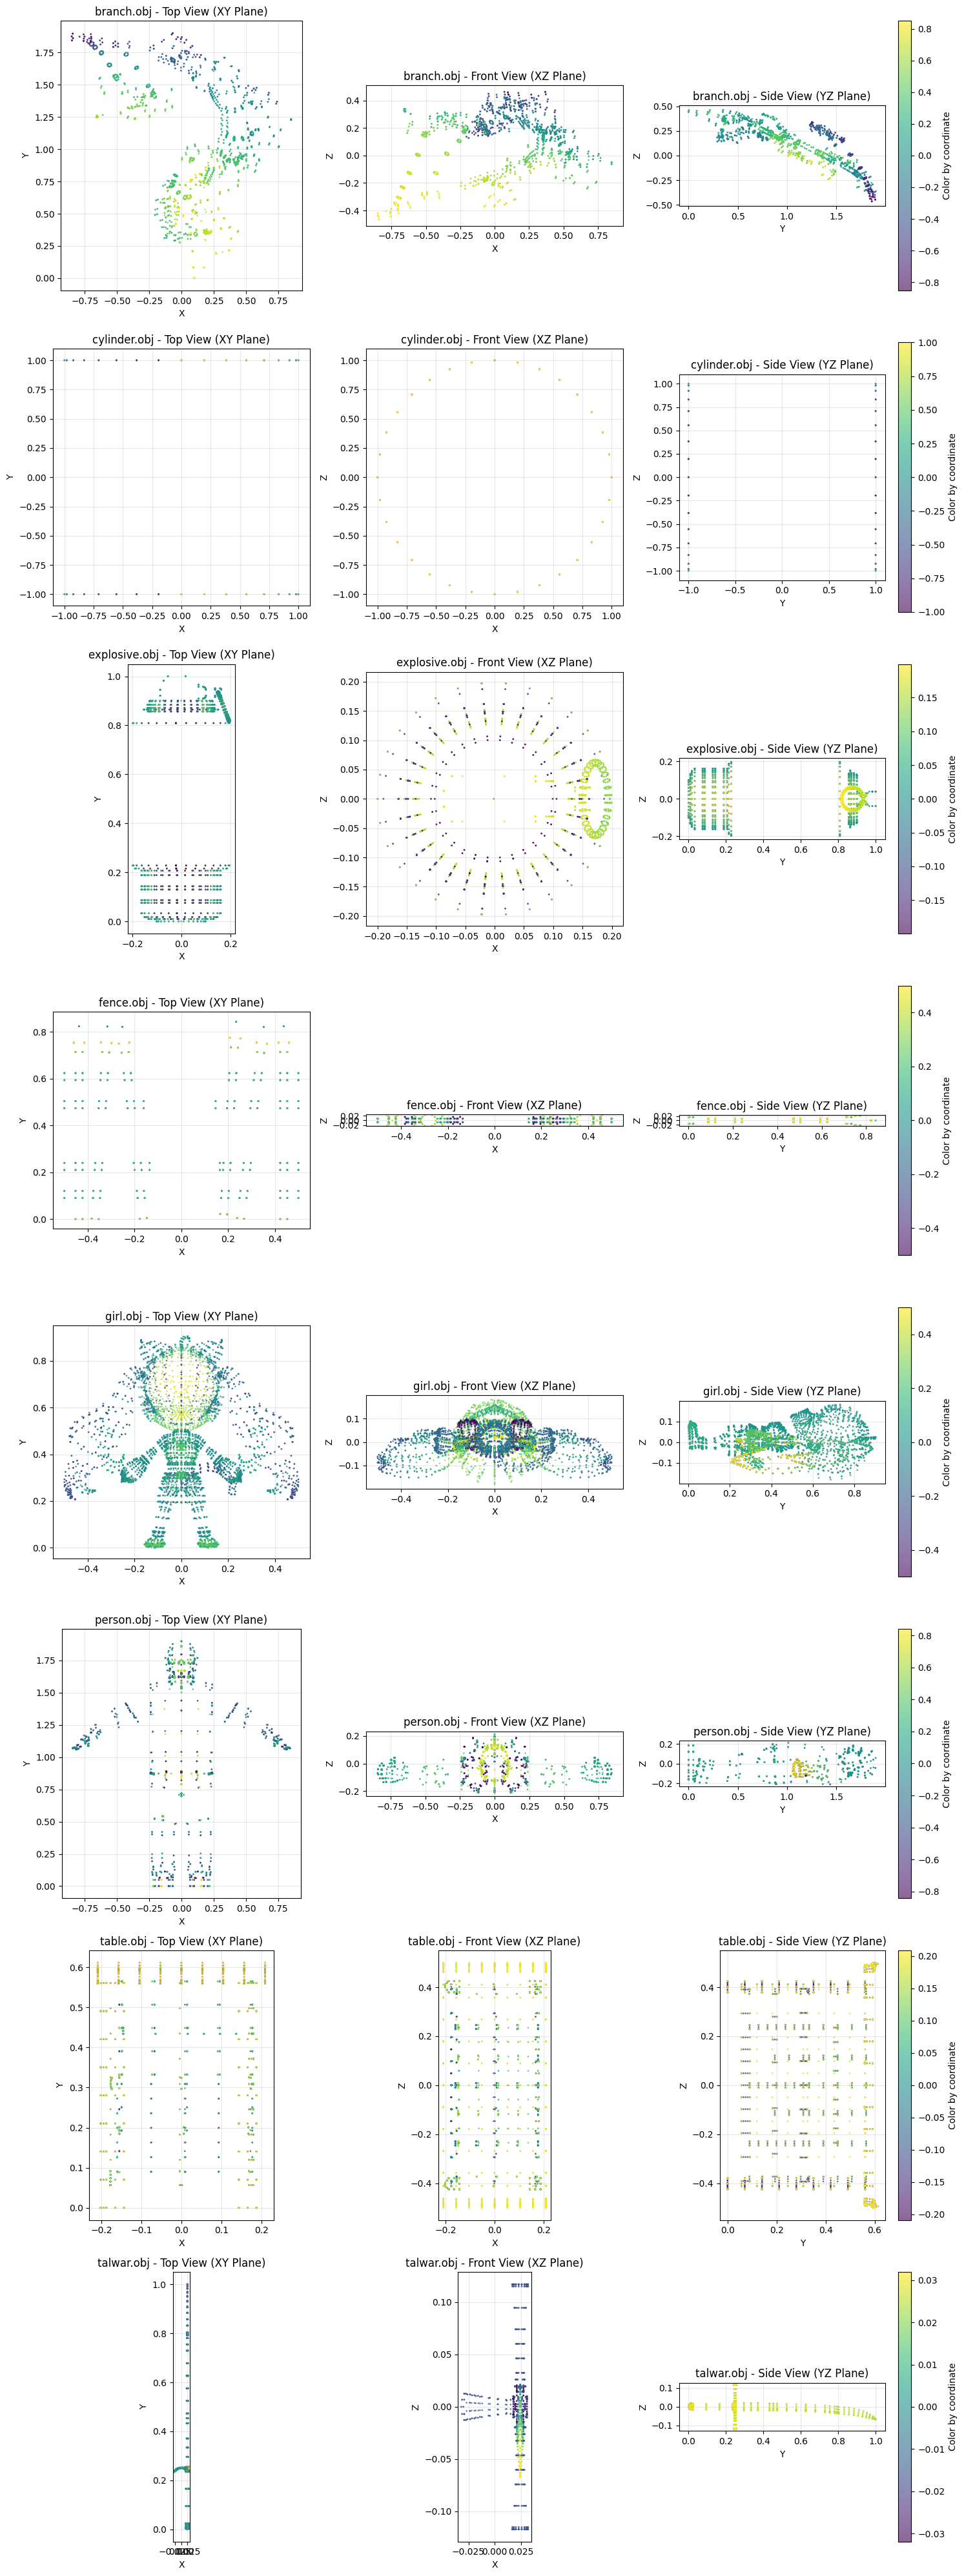

✓ 2D projections displayed for all 8 meshes!


In [8]:
# Since doing a 3D projection was not able to run I decided to go ith 2D projection using pyplot
# We wil create a 2D projections for all meshes in a grid showing the vertex distribution
num_meshes = len(meshes)
cols = 3  # 3 views per mesh
rows = num_meshes

fig = plt.figure(figsize=(15, 5 * num_meshes))

colors_plt = plt.cm.tab10(np.linspace(0, 1, num_meshes))

for idx, (name, vertices) in enumerate(all_vertices.items()):
    x_coords = vertices[:, 0]
    y_coords = vertices[:, 1]
    z_coords = vertices[:, 2]
    
    base_idx = idx * cols
    
    # XY plane (Top view)
    ax1 = fig.add_subplot(rows, cols, base_idx + 1)
    ax1.scatter(x_coords, y_coords, c=z_coords, cmap='viridis', s=1, alpha=0.6)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title(f'{name} - Top View (XY Plane)')
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    
    # XZ plane (Front view)
    ax2 = fig.add_subplot(rows, cols, base_idx + 2)
    ax2.scatter(x_coords, z_coords, c=y_coords, cmap='viridis', s=1, alpha=0.6)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Z')
    ax2.set_title(f'{name} - Front View (XZ Plane)')
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    
    # YZ plane (Side view)
    ax3 = fig.add_subplot(rows, cols, base_idx + 3)
    scatter = ax3.scatter(y_coords, z_coords, c=x_coords, cmap='viridis', s=1, alpha=0.6)
    ax3.set_xlabel('Y')
    ax3.set_ylabel('Z')
    ax3.set_title(f'{name} - Side View (YZ Plane)')
    ax3.set_aspect('equal')
    ax3.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax3, label='Color by coordinate')

plt.tight_layout()
plt.show()

print(f"✓ 2D projections displayed for all {num_meshes} meshes!")

In [7]:
# TASK 2=

In [9]:
# we will be normalizing our data using two methods ( min-max and unit sphere)

def normalize_min_max(vertices):
    """
    Min-Max Normalization: Scales all coordinates to [0, 1] range
    Formula: (x - min) / (max - min)
    
    Args:
        vertices: numpy array of shape (N, 3) containing vertex coordinates
        
    """
    vertices = np.array(vertices)
    
    # Calculate min and max for each axis
    min_vals = np.min(vertices, axis=0)
    max_vals = np.max(vertices, axis=0)
    
    # Avoid division by zero
    range_vals = max_vals - min_vals
    range_vals[range_vals == 0] = 1
    
    # Normalize to [0, 1]
    normalized_vertices = (vertices - min_vals) / range_vals
    
    # Store parameters for potential denormalization
    normalization_params = {
        'method': 'min_max',
        'min_vals': min_vals,
        'max_vals': max_vals,
        'range_vals': range_vals
    }
    
    return normalized_vertices, normalization_params


def normalize_unit_sphere(vertices):
    """
    Unit Sphere Normalization: Centers the mesh at origin and scales to fit within unit sphere
    
    Steps:
    1. Center the mesh by subtracting the centroid
    2. Scale so the farthest point is at distance 1 from origin
    
    """
    vertices = np.array(vertices)
    
    # Calculate centroid (center of mass)
    centroid = np.mean(vertices, axis=0)
    
    # Center the vertices
    centered_vertices = vertices - centroid
    
    # Calculate maximum distance from origin
    max_distance = np.max(np.linalg.norm(centered_vertices, axis=1))
    
    # Avoid division by zero
    if max_distance == 0:
        max_distance = 1
    
    # Scale to unit sphere
    normalized_vertices = centered_vertices / max_distance
    
    # Store parameters for potential denormalization
    normalization_params = {
        'method': 'unit_sphere',
        'centroid': centroid,
        'scale_factor': max_distance
    }
    
    return normalized_vertices, normalization_params


# Now I will test the normalization functions on one mesh using Min-Max and Unit Sphere normalization methods


# Choose the first mesh for demonstration
test_mesh_name = list(meshes.keys())[0]
test_vertices = all_vertices[test_mesh_name]

#this is the original mesh statistics before normalization
print(f"\nOriginal {test_mesh_name} statistics:")
print(f"  X range: [{test_vertices[:, 0].min():.6f}, {test_vertices[:, 0].max():.6f}]")
print(f"  Y range: [{test_vertices[:, 1].min():.6f}, {test_vertices[:, 1].max():.6f}]")
print(f"  Z range: [{test_vertices[:, 2].min():.6f}, {test_vertices[:, 2].max():.6f}]")
print(f"  Centroid: {np.mean(test_vertices, axis=0)}")

# Testing Min-Max Normalization
normalized_minmax, params_minmax = normalize_min_max(test_vertices)
print(f"\nTesting Min-Max Normalization:")
print(f"  X range: [{normalized_minmax[:, 0].min():.6f}, {normalized_minmax[:, 0].max():.6f}]")
print(f"  Y range: [{normalized_minmax[:, 1].min():.6f}, {normalized_minmax[:, 1].max():.6f}]")
print(f"  Z range: [{normalized_minmax[:, 2].min():.6f}, {normalized_minmax[:, 2].max():.6f}]")
print(f"  Centroid: {np.mean(normalized_minmax, axis=0)}")

# Testing Unit Sphere Normalization
normalized_sphere, params_sphere = normalize_unit_sphere(test_vertices)
print(f"\nTesting Unit Sphere Normalization:")
print(f"  X range: [{normalized_sphere[:, 0].min():.6f}, {normalized_sphere[:, 0].max():.6f}]")
print(f"  Y range: [{normalized_sphere[:, 1].min():.6f}, {normalized_sphere[:, 1].max():.6f}]")
print(f"  Z range: [{normalized_sphere[:, 2].min():.6f}, {normalized_sphere[:, 2].max():.6f}]")
print(f"  Centroid: {np.mean(normalized_sphere, axis=0)}")
print(f"  Max distance from origin: {np.max(np.linalg.norm(normalized_sphere, axis=1)):.6f}")


Original branch.obj statistics:
  X range: [-0.851562, 0.849609]
  Y range: [0.000000, 1.900391]
  Z range: [-0.464844, 0.462891]
  Centroid: [0.0754427  1.0873903  0.12196689]

Testing Min-Max Normalization:
  X range: [0.000000, 1.000000]
  Y range: [0.000000, 1.000000]
  Z range: [0.000000, 1.000000]
  Centroid: [0.54492153 0.57219293 0.63251994]

Testing Unit Sphere Normalization:
  X range: [-0.686468, 0.573288]
  Y range: [-0.805237, 0.602045]
  Z range: [-0.434547, 0.252462]
  Centroid: [ 2.99483363e-16 -4.17928552e-15  5.45361451e-16]
  Max distance from origin: 1.000000


In [10]:
# In this step we will perform quantization of bin size of 1024 for each method

def quantize_vertices(vertices, bin_size=1024):
    """
    Quantize vertex coordinates to discrete bins
    
    Args:
        vertices: numpy array of normalized vertices (assumed to be in [0, 1] or [-1, 1] range)
        bin_size: number of discrete bins (default: 1024)
    
    """
    vertices = np.array(vertices)
    
    # Find the actual range of the data
    min_val = np.min(vertices)
    max_val = np.max(vertices)
    data_range = max_val - min_val
    
    # Avoid division by zero
    if data_range == 0:
        data_range = 1
    
    # Scale to [0, bin_size-1] range
    scaled = ((vertices - min_val) / data_range) * (bin_size - 1)
    
    # Quantize by rounding to nearest integer
    quantized = np.round(scaled).astype(np.int32)
    
    # Convert back to floating point in the original range
    quantized_vertices = (quantized.astype(np.float32) / (bin_size - 1)) * data_range + min_val
    
    quantization_params = {
        'bin_size': bin_size,
        'min_val': min_val,
        'max_val': max_val,
        'data_range': data_range
    }
    
    return quantized_vertices, quantization_params


# Testing quantization on normalized vertices

# Applying quantization on Min-Max function
print(f"\nQuantizing Min-Max normalized {test_mesh_name}:")
print(f"  Before quantization - unique X values: {len(np.unique(normalized_minmax[:, 0]))}")
quantized_minmax, quant_params_minmax = quantize_vertices(normalized_minmax, bin_size=1024)
print(f"  After quantization - unique X values: {len(np.unique(quantized_minmax[:, 0]))}")
print(f"  X range: [{quantized_minmax[:, 0].min():.6f}, {quantized_minmax[:, 0].max():.6f}]")

#Applying quantization on Unit Sphere function
print(f"\nQuantizing Unit Sphere normalized {test_mesh_name}:")
print(f"  Before quantization - unique X values: {len(np.unique(normalized_sphere[:, 0]))}")
quantized_sphere, quant_params_sphere = quantize_vertices(normalized_sphere, bin_size=1024)
print(f"  After quantization - unique X values: {len(np.unique(quantized_sphere[:, 0]))}")
print(f"  X range: [{quantized_sphere[:, 0].min():.6f}, {quantized_sphere[:, 0].max():.6f}]")




Quantizing Min-Max normalized branch.obj:
  Before quantization - unique X values: 475
  After quantization - unique X values: 475
  X range: [0.000000, 1.000000]

Quantizing Unit Sphere normalized branch.obj:
  Before quantization - unique X values: 475
  After quantization - unique X values: 475
  X range: [-0.686932, 0.573157]


In [11]:
# Processing all meshes with both normalization methods and use quantization

# Storage for processed meshes
normalized_meshes_minmax = {}
normalized_meshes_sphere = {}
quantized_meshes_minmax = {}
quantized_meshes_sphere = {}

# Storage for parameters
norm_params_minmax = {}
norm_params_sphere = {}
quant_params_minmax = {}
quant_params_sphere = {}

for mesh_name, vertices in all_vertices.items():
 
    
    # Method 1: Min-Max Normalization
    norm_verts_minmax, params_mm = normalize_min_max(vertices)
    normalized_meshes_minmax[mesh_name] = norm_verts_minmax
    norm_params_minmax[mesh_name] = params_mm
    
    # Quantize Min-Max normalized vertices
    quant_verts_minmax, params_qmm = quantize_vertices(norm_verts_minmax, bin_size=1024)
    quantized_meshes_minmax[mesh_name] = quant_verts_minmax
    quant_params_minmax[mesh_name] = params_qmm
    
    # Method 2: Unit Sphere Normalization
    norm_verts_sphere, params_us = normalize_unit_sphere(vertices)
    normalized_meshes_sphere[mesh_name] = norm_verts_sphere
    norm_params_sphere[mesh_name] = params_us
    
    # Quantize Unit Sphere normalized vertices
    quant_verts_sphere, params_qus = quantize_vertices(norm_verts_sphere, bin_size=1024)
    quantized_meshes_sphere[mesh_name] = quant_verts_sphere
    quant_params_sphere[mesh_name] = params_qus
    
# Results are printed
print(f"\nTotal meshes processed: {len(meshes)}")
print(f"  - {len(normalized_meshes_minmax)} Min-Max normalized meshes")
print(f"  - {len(normalized_meshes_sphere)} Unit Sphere normalized meshes")
print(f"  - {len(quantized_meshes_minmax)} Min-Max quantized meshes")
print(f"  - {len(quantized_meshes_sphere)} Unit Sphere quantized meshes")


Total meshes processed: 8
  - 8 Min-Max normalized meshes
  - 8 Unit Sphere normalized meshes
  - 8 Min-Max quantized meshes
  - 8 Unit Sphere quantized meshes


In [11]:
# In this step I saved all the processed meshes as .obj as other files are also saved as objects
# Create output directories
output_dir = "processed_meshes"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, "normalized_minmax"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "normalized_sphere"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "quantized_minmax"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "quantized_sphere"), exist_ok=True)


for mesh_name in meshes.keys():
    # Get original mesh faces
    original_mesh = meshes[mesh_name]
    faces = original_mesh.faces
    
    base_name = mesh_name.replace('.obj', '')
    
    # Save Min-Max Normalized Mesh
    norm_mm_mesh = trimesh.Trimesh(
        vertices=normalized_meshes_minmax[mesh_name],
        faces=faces
    )
    # Save as .obj
    norm_mm_obj_path = os.path.join(output_dir, "normalized_minmax", f"{base_name}_normalized_minmax.obj")
    norm_mm_mesh.export(norm_mm_obj_path)
   
    
    # Save Unit Sphere Normalized Mesh
    norm_us_mesh = trimesh.Trimesh(
        vertices=normalized_meshes_sphere[mesh_name],
        faces=faces
    )
    # Save as .obj
    norm_us_obj_path = os.path.join(output_dir, "normalized_sphere", f"{base_name}_normalized_sphere.obj")
    norm_us_mesh.export(norm_us_obj_path)
   
    
    # Save Min-Max Quantized Mesh
    quant_mm_mesh = trimesh.Trimesh(
        vertices=quantized_meshes_minmax[mesh_name],
        faces=faces
    )
    # Save as .obj
    quant_mm_obj_path = os.path.join(output_dir, "quantized_minmax", f"{base_name}_quantized_minmax.obj")
    quant_mm_mesh.export(quant_mm_obj_path)

    
    # Save Unit Sphere Quantized Mesh
    quant_us_mesh = trimesh.Trimesh(
        vertices=quantized_meshes_sphere[mesh_name],
        faces=faces
    )
    # Save as .obj
    quant_us_obj_path = os.path.join(output_dir, "quantized_sphere", f"{base_name}_quantized_sphere.obj")
    quant_us_mesh.export(quant_us_obj_path)

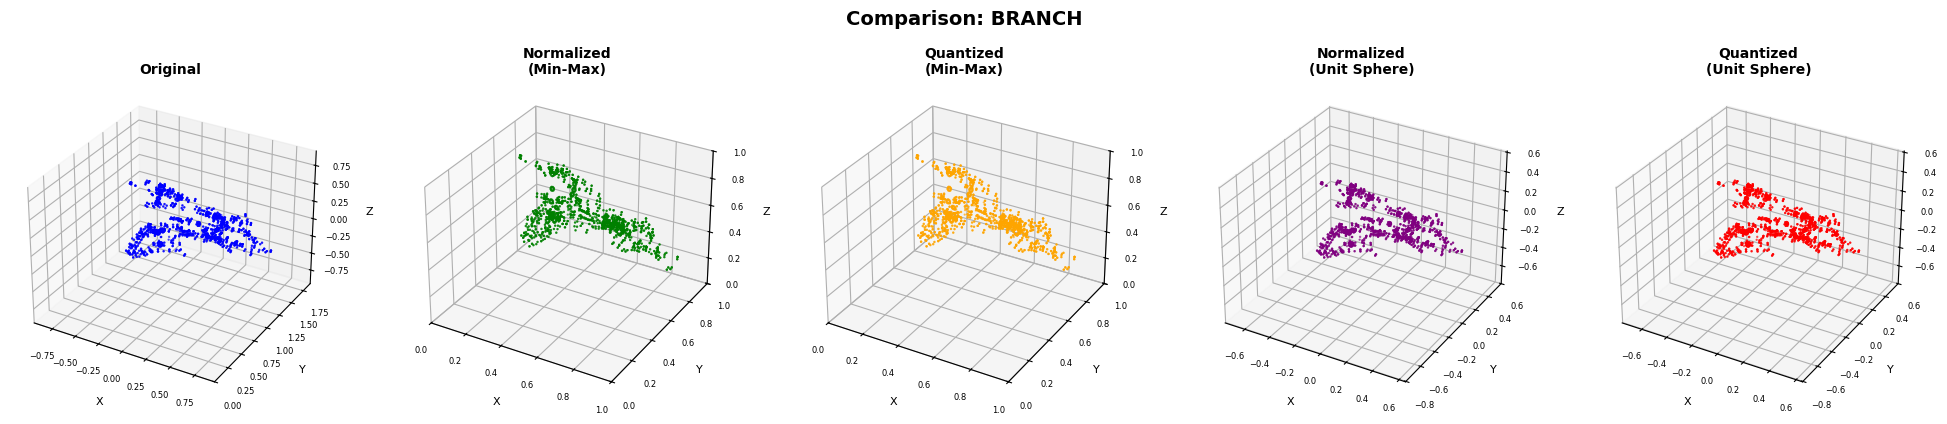

✓ Visualization for branch


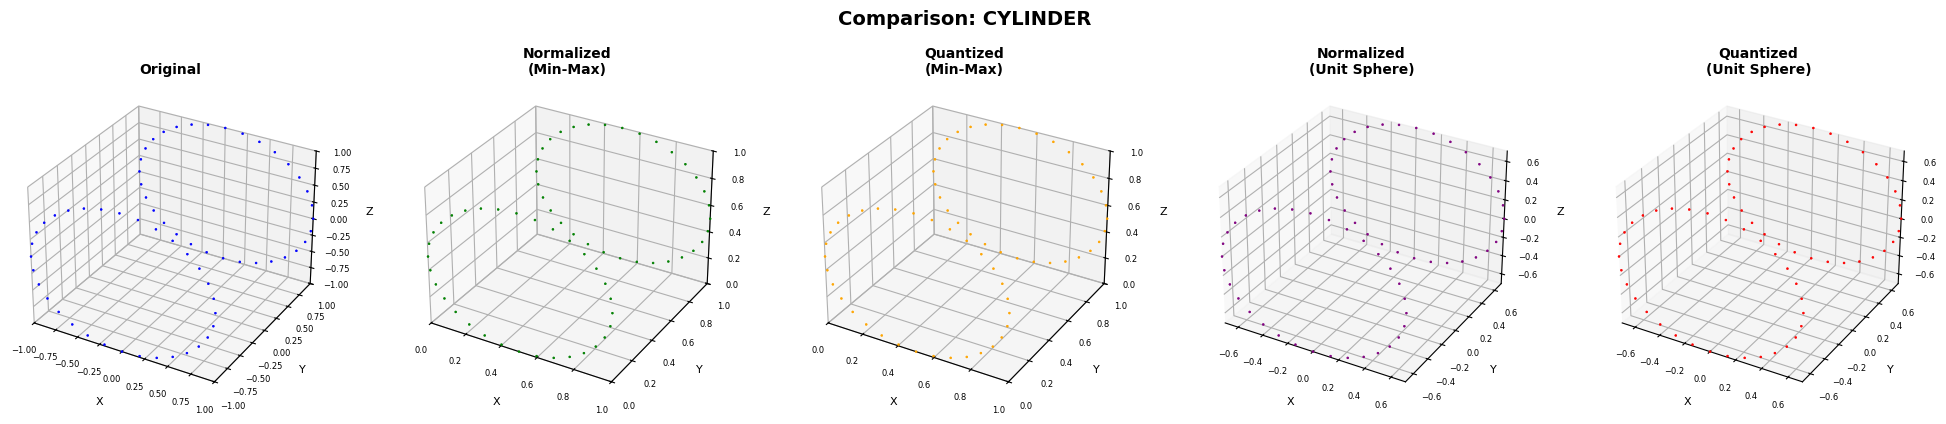

✓ Visualization for cylinder


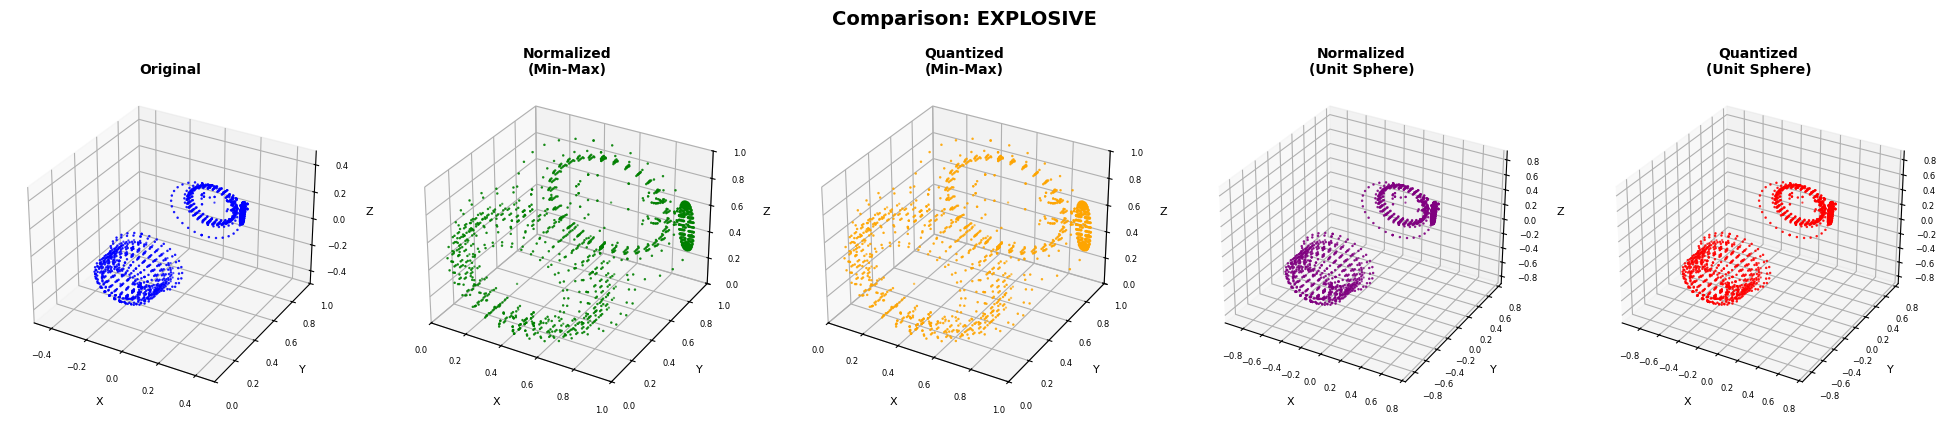

✓ Visualization for explosive


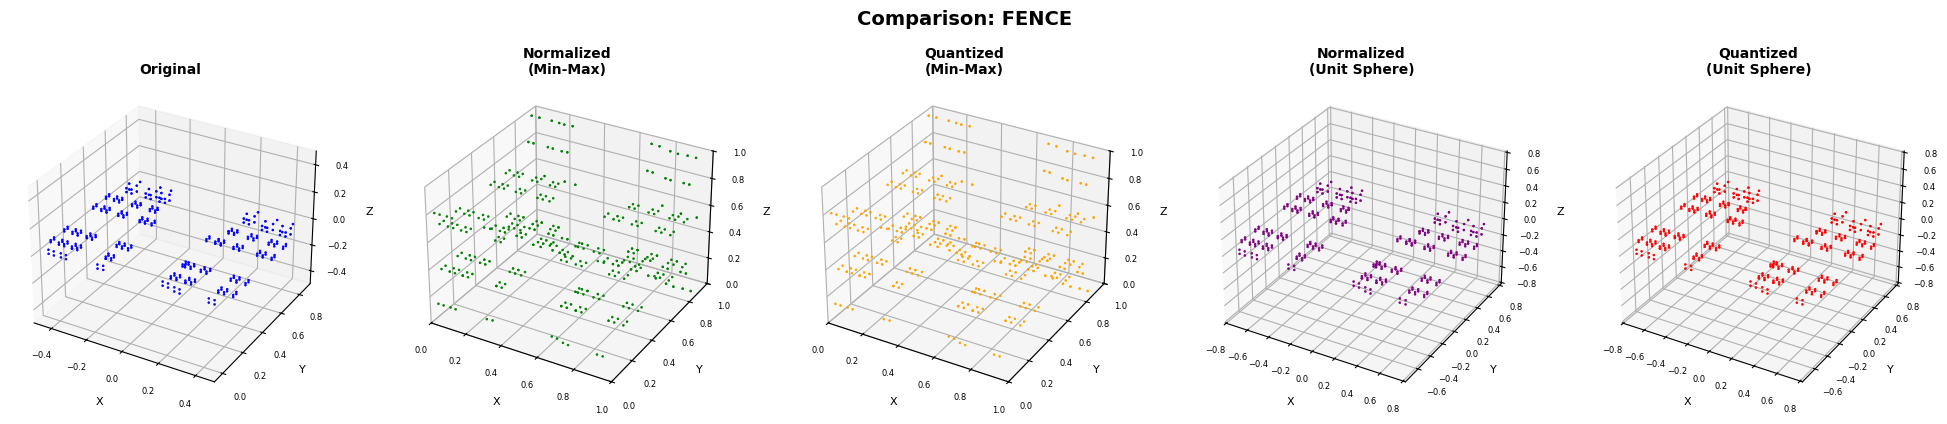

✓ Visualization for fence


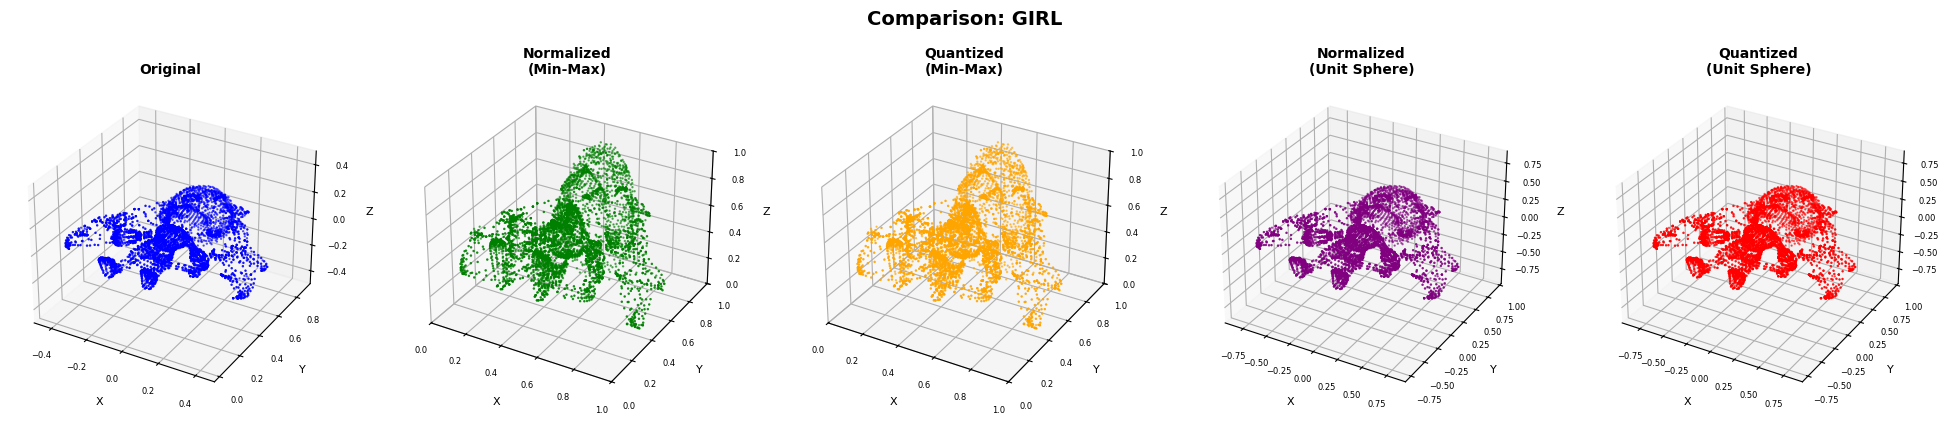

✓ Visualization for girl


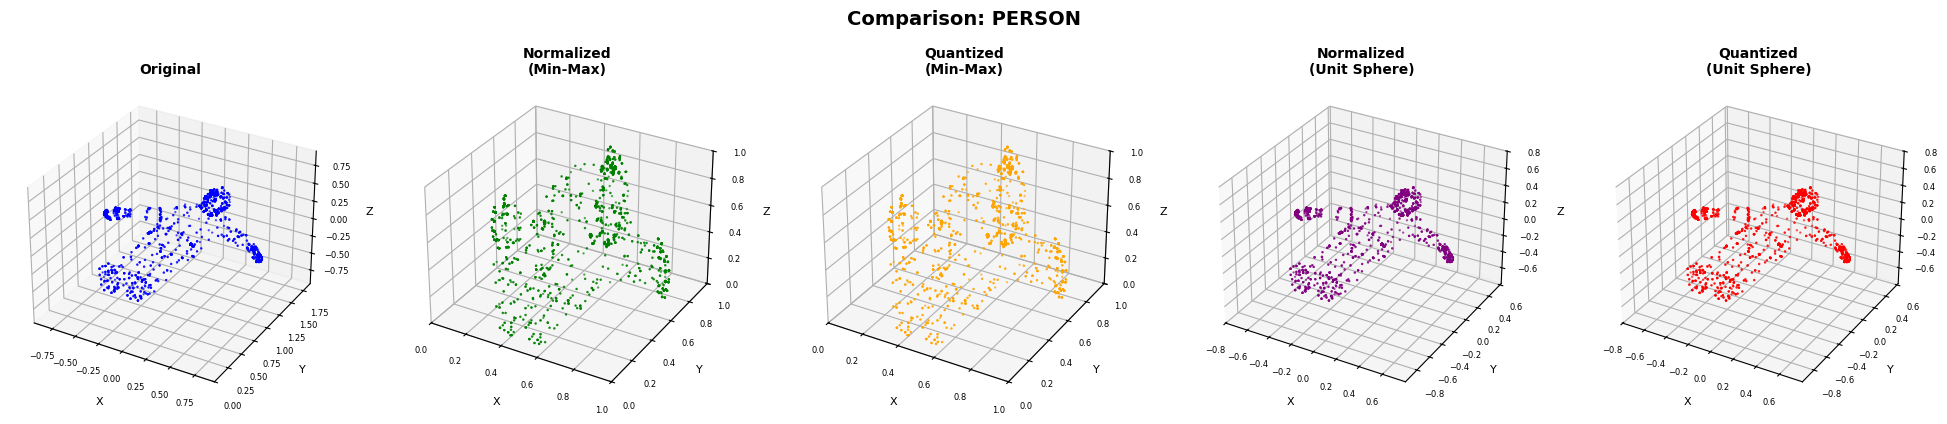

✓ Visualization for person


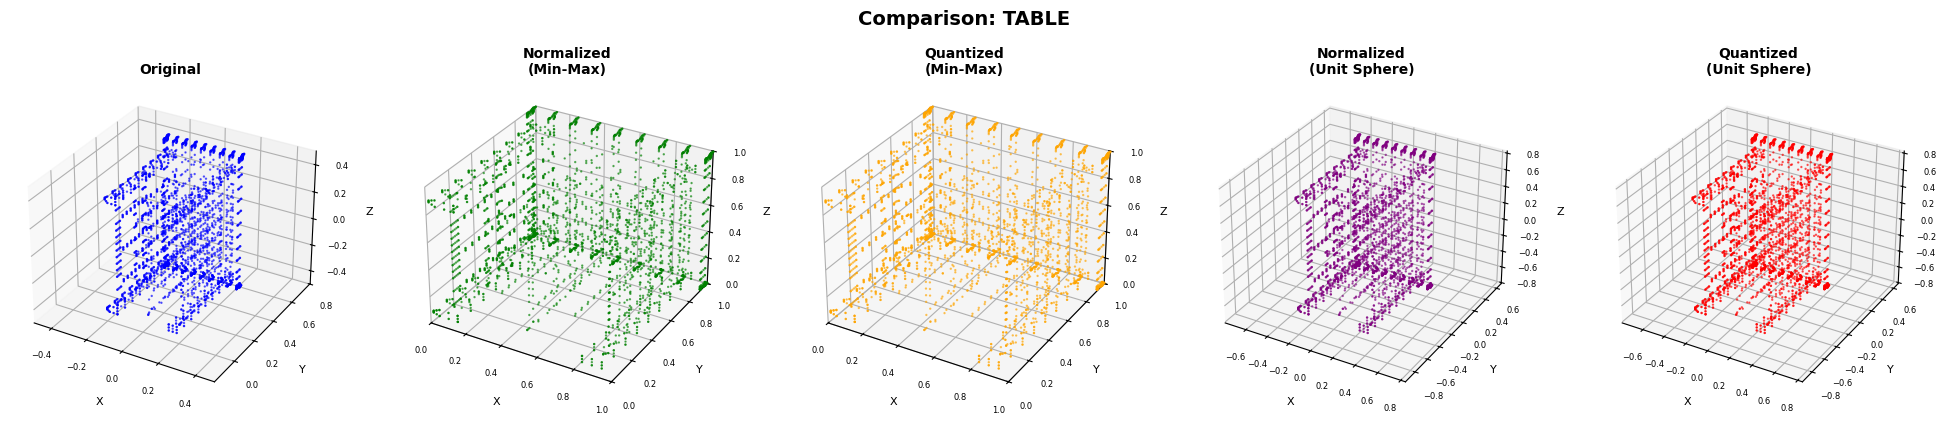

✓ Visualization for table


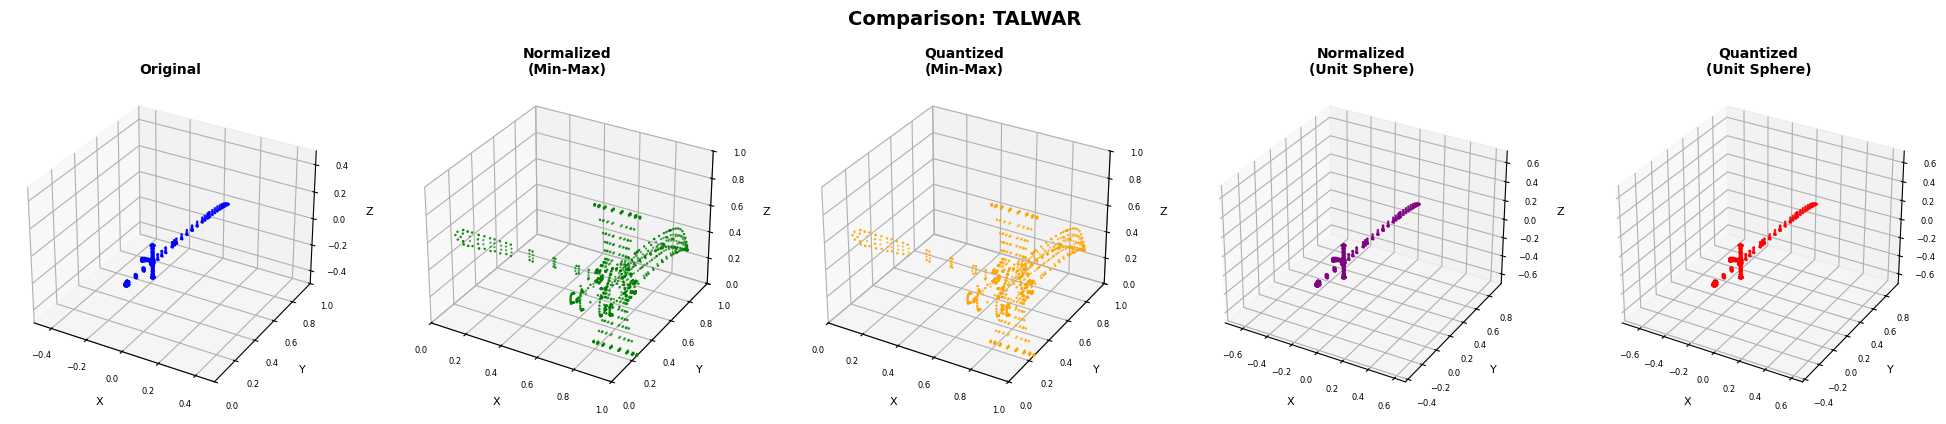

✓ Visualization for talwar


In [13]:
# Visualize comparison for each mesh: Original vs Normalized vs Quantized
# We'll create a comprehensive visualization showing all stages

num_meshes = len(meshes)

# For each mesh, create a figure with 5 subplots: Original, Norm-MM, Quant-MM, Norm-Sphere, Quant-Sphere
for mesh_name in meshes.keys():
    base_name = mesh_name.replace('.obj', '')
    
    # Get all versions of vertices
    original_verts = all_vertices[mesh_name]
    norm_mm_verts = normalized_meshes_minmax[mesh_name]
    quant_mm_verts = quantized_meshes_minmax[mesh_name]
    norm_sphere_verts = normalized_meshes_sphere[mesh_name]
    quant_sphere_verts = quantized_meshes_sphere[mesh_name]
    
    # Create figure with 5 columns (one for each version)
    fig = plt.figure(figsize=(20, 4))
    
    versions = [
        ('Original', original_verts, 'blue'),
        ('Normalized\n(Min-Max)', norm_mm_verts, 'green'),
        ('Quantized\n(Min-Max)', quant_mm_verts, 'orange'),
        ('Normalized\n(Unit Sphere)', norm_sphere_verts, 'purple'),
        ('Quantized\n(Unit Sphere)', quant_sphere_verts, 'red')
    ]
    
    for idx, (title, verts, color) in enumerate(versions, 1):
        ax = fig.add_subplot(1, 5, idx, projection='3d')
        
        # Plot vertices
        ax.scatter(verts[:, 0], verts[:, 1], verts[:, 2], 
                  c=color, s=0.5, alpha=0.6)
        
        ax.set_xlabel('X', fontsize=8)
        ax.set_ylabel('Y', fontsize=8)
        ax.set_zlabel('Z', fontsize=8)
        ax.set_title(title, fontsize=10, fontweight='bold')
        
        # Make axes equal
        max_range = np.array([
            verts[:, 0].max() - verts[:, 0].min(),
            verts[:, 1].max() - verts[:, 1].min(),
            verts[:, 2].max() - verts[:, 2].min()
        ]).max() / 2.0
        
        mid_x = (verts[:, 0].max() + verts[:, 0].min()) * 0.5
        mid_y = (verts[:, 1].max() + verts[:, 1].min()) * 0.5
        mid_z = (verts[:, 2].max() + verts[:, 2].min()) * 0.5
        
        ax.set_xlim(mid_x - max_range, mid_x + max_range)
        ax.set_ylim(mid_y - max_range, mid_y + max_range)
        ax.set_zlim(mid_z - max_range, mid_z + max_range)
        
        # Smaller tick labels
        ax.tick_params(labelsize=6)
    
    fig.suptitle(f'Comparison: {base_name.upper()}', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    print(f"✓ Visualization for {base_name}")

In [ ]:
# Now I will write a short comparission between which normalization method preserves the mesh structure better

In [ ]:
'''
Short comparision for both methods :

1. Min-Max Normalization : It Scales each axis to [0, 1] using (x - min) / (max - min).

Pros of this method are : Simple, keeps proportions, predictable range.

Disadvantages are :  Not centered, sensitive to outliers, depends on the axis.

Best for: Box-shaped or axis-aligned meshes.

2. Unit Sphere Normalization : Centers mesh at origin and scales so the farthest vertex is at distance 1.

Pros are : Non-deform, centered at origin (0,0,0), rotation-invariant, ready for ML.

Cons are : Range varies ([-1,1]), may waste resolution on thin shapes.

Best for: organic or irregular meshes, machine learning use.

3. Quantization (1024 bins)

Both methods slightly distort geometry after quantization, but the distortion is minimal.

4. Conclusion is that we should use Unit Sphere Normalization because :

-- It Keeps exact shape, and is centered at the origin.
-- Works better for all types of meshes and ML applications.

5. We should only use Min-Max when you need values strictly in the [0, 1] range.

'''

In [ ]:
# TASK 3: Dequantize, Denormalize, and Measure Error

In [15]:
# Step 1: Create functions for dequantization and denormalization

def dequantize_vertices(quantized_vertices, quantization_params):
    """
    Dequantize vertices back to normalized coordinates
    
    Args:
        quantized_vertices: quantized vertex array
        quantization_params: parameters used during quantization
        
    """
    # The quantized_vertices are already in the normalized range after quantization
    # No additional processing needed as quantize_vertices function already returns 
    # values in the original normalized range
    return quantized_vertices.copy()


def denormalize_min_max(normalized_vertices, normalization_params):
    """
    Reverse Min-Max normalization to recover original coordinates
    
    Formula: x_original = x_normalized * range + min
    
    Args:
        normalized_vertices: normalized vertex array
        normalization_params: parameters from original normalization
        
    """
    min_vals = normalization_params['min_vals']
    range_vals = normalization_params['range_vals']
    
    denormalized_vertices = normalized_vertices * range_vals + min_vals
    
    return denormalized_vertices


def denormalize_unit_sphere(normalized_vertices, normalization_params):
    """
    Reverse Unit Sphere normalization to recover original coordinates
    
    Steps:
    1. Scale back by the scale factor
    2. Add back the centroid
    
    Args:
        normalized_vertices: normalized vertex array
        normalization_params: parameters from original normalization
        
    """
    centroid = normalization_params['centroid']
    scale_factor = normalization_params['scale_factor']
    
    # Reverse the scaling
    scaled_vertices = normalized_vertices * scale_factor
    
    # Reverse the centering
    denormalized_vertices = scaled_vertices + centroid
    
    return denormalized_vertices

✓ Dequantization and denormalization functions created successfully!


In [16]:
# Now I will process all meshes - Dequantize and Denormalize

# Storage for reconstructed meshes
reconstructed_meshes_minmax = {}
reconstructed_meshes_sphere = {}


for mesh_name in meshes.keys():
    # Method 1: Min-Max (Quantized → Dequantized → Denormalized)
    dequantized_minmax = dequantize_vertices(
        quantized_meshes_minmax[mesh_name], 
        quant_params_minmax[mesh_name]
    )
    reconstructed_minmax = denormalize_min_max(
        dequantized_minmax, 
        norm_params_minmax[mesh_name]
    )
    reconstructed_meshes_minmax[mesh_name] = reconstructed_minmax
    
    # Method 2: Unit Sphere (Quantized → Dequantized → Denormalized)
    dequantized_sphere = dequantize_vertices(
        quantized_meshes_sphere[mesh_name], 
        quant_params_sphere[mesh_name]
    )
    reconstructed_sphere = denormalize_unit_sphere(
        dequantized_sphere, 
        norm_params_sphere[mesh_name]
    )
    reconstructed_meshes_sphere[mesh_name] = reconstructed_sphere
    


✓ Total meshes reconstructed: 8 (Min-Max) + 8 (Unit Sphere)
✓ Ready for error analysis!


In [18]:
# Step 3: Compute Error Metrics (MSE and MAE)

def compute_mse(original, reconstructed):
    """
    Compute Mean Squared Error
    MSE = mean((original - reconstructed)^2)
    """
    return np.mean((original - reconstructed) ** 2)


def compute_mae(original, reconstructed):
    """
    Compute Mean Absolute Error
    MAE = mean(|original - reconstructed|)
    """
    return np.mean(np.abs(original - reconstructed))


def compute_per_axis_error(original, reconstructed):
    """
    Compute MSE and MAE per axis (X, Y, Z)
    """
    errors = {}
    for i, axis in enumerate(['X', 'Y', 'Z']):
        mse = np.mean((original[:, i] - reconstructed[:, i]) ** 2)
        mae = np.mean(np.abs(original[:, i] - reconstructed[:, i]))
        errors[axis] = {'MSE': mse, 'MAE': mae}
    return errors


# Storage for error metrics
error_results = {
    'minmax': {},
    'sphere': {}
}

for mesh_name in meshes.keys():
    original_verts = all_vertices[mesh_name]
    
    # Min-Max reconstruction errors
    reconstructed_mm = reconstructed_meshes_minmax[mesh_name]
    mse_mm = compute_mse(original_verts, reconstructed_mm)
    mae_mm = compute_mae(original_verts, reconstructed_mm)
    per_axis_mm = compute_per_axis_error(original_verts, reconstructed_mm)
    
    error_results['minmax'][mesh_name] = {
        'MSE': mse_mm,
        'MAE': mae_mm,
        'per_axis': per_axis_mm,
        'original': original_verts,
        'reconstructed': reconstructed_mm
    }
    
    # Unit Sphere reconstruction errors
    reconstructed_sp = reconstructed_meshes_sphere[mesh_name]
    mse_sp = compute_mse(original_verts, reconstructed_sp)
    mae_sp = compute_mae(original_verts, reconstructed_sp)
    per_axis_sp = compute_per_axis_error(original_verts, reconstructed_sp)
    
    error_results['sphere'][mesh_name] = {
        'MSE': mse_sp,
        'MAE': mae_sp,
        'per_axis': per_axis_sp,
        'original': original_verts,
        'reconstructed': reconstructed_sp
    }
    



In [ ]:
# Step 4: Visualize Reconstructed Meshes vs Original

print("Generating reconstruction visualizations...\n")

for mesh_name in meshes.keys():
    base_name = mesh_name.replace('.obj', '')
    
    # Get vertices
    original_verts = all_vertices[mesh_name]
    reconstructed_mm = reconstructed_meshes_minmax[mesh_name]
    reconstructed_sp = reconstructed_meshes_sphere[mesh_name]
    
    # Create figure with 3 subplots
    fig = plt.figure(figsize=(18, 6))
    
    # Original mesh
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax1.scatter(original_verts[:, 0], original_verts[:, 1], original_verts[:, 2], 
                c='blue', s=1, alpha=0.6, label='Original')
    ax1.set_title(f'Original\n{base_name}', fontsize=12, fontweight='bold')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    # Reconstructed - Min-Max
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax2.scatter(reconstructed_mm[:, 0], reconstructed_mm[:, 1], reconstructed_mm[:, 2], 
                c='green', s=1, alpha=0.6, label='Reconstructed')
    mse_mm = error_results['minmax'][mesh_name]['MSE']
    mae_mm = error_results['minmax'][mesh_name]['MAE']
    ax2.set_title(f'Reconstructed (Min-Max)\nMSE: {mse_mm:.6f} | MAE: {mae_mm:.6f}', 
                  fontsize=10, fontweight='bold')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    
    # Reconstructed - Unit Sphere
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.scatter(reconstructed_sp[:, 0], reconstructed_sp[:, 1], reconstructed_sp[:, 2], 
                c='red', s=1, alpha=0.6, label='Reconstructed')
    mse_sp = error_results['sphere'][mesh_name]['MSE']
    mae_sp = error_results['sphere'][mesh_name]['MAE']
    ax3.set_title(f'Reconstructed (Unit Sphere)\nMSE: {mse_sp:.6f} | MAE: {mae_sp:.6f}', 
                  fontsize=10, fontweight='bold')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    
    # Make all plots have the same scale for fair comparison
    all_verts = np.vstack([original_verts, reconstructed_mm, reconstructed_sp])
    max_range = np.array([
        all_verts[:, 0].max() - all_verts[:, 0].min(),
        all_verts[:, 1].max() - all_verts[:, 1].min(),
        all_verts[:, 2].max() - all_verts[:, 2].min()
    ]).max() / 2.0
    
    mid_x = (all_verts[:, 0].max() + all_verts[:, 0].min()) * 0.5
    mid_y = (all_verts[:, 1].max() + all_verts[:, 1].min()) * 0.5
    mid_z = (all_verts[:, 2].max() + all_verts[:, 2].min()) * 0.5
    
    for ax in [ax1, ax2, ax3]:
        ax.set_xlim(mid_x - max_range, mid_x + max_range)
        ax.set_ylim(mid_y - max_range, mid_y + max_range)
        ax.set_zlim(mid_z - max_range, mid_z + max_range)
    
    plt.tight_layout()
    plt.show()
    
    print(f"✓ Visualization complete for {base_name}")

print("\n✓ All reconstruction visualizations completed!")

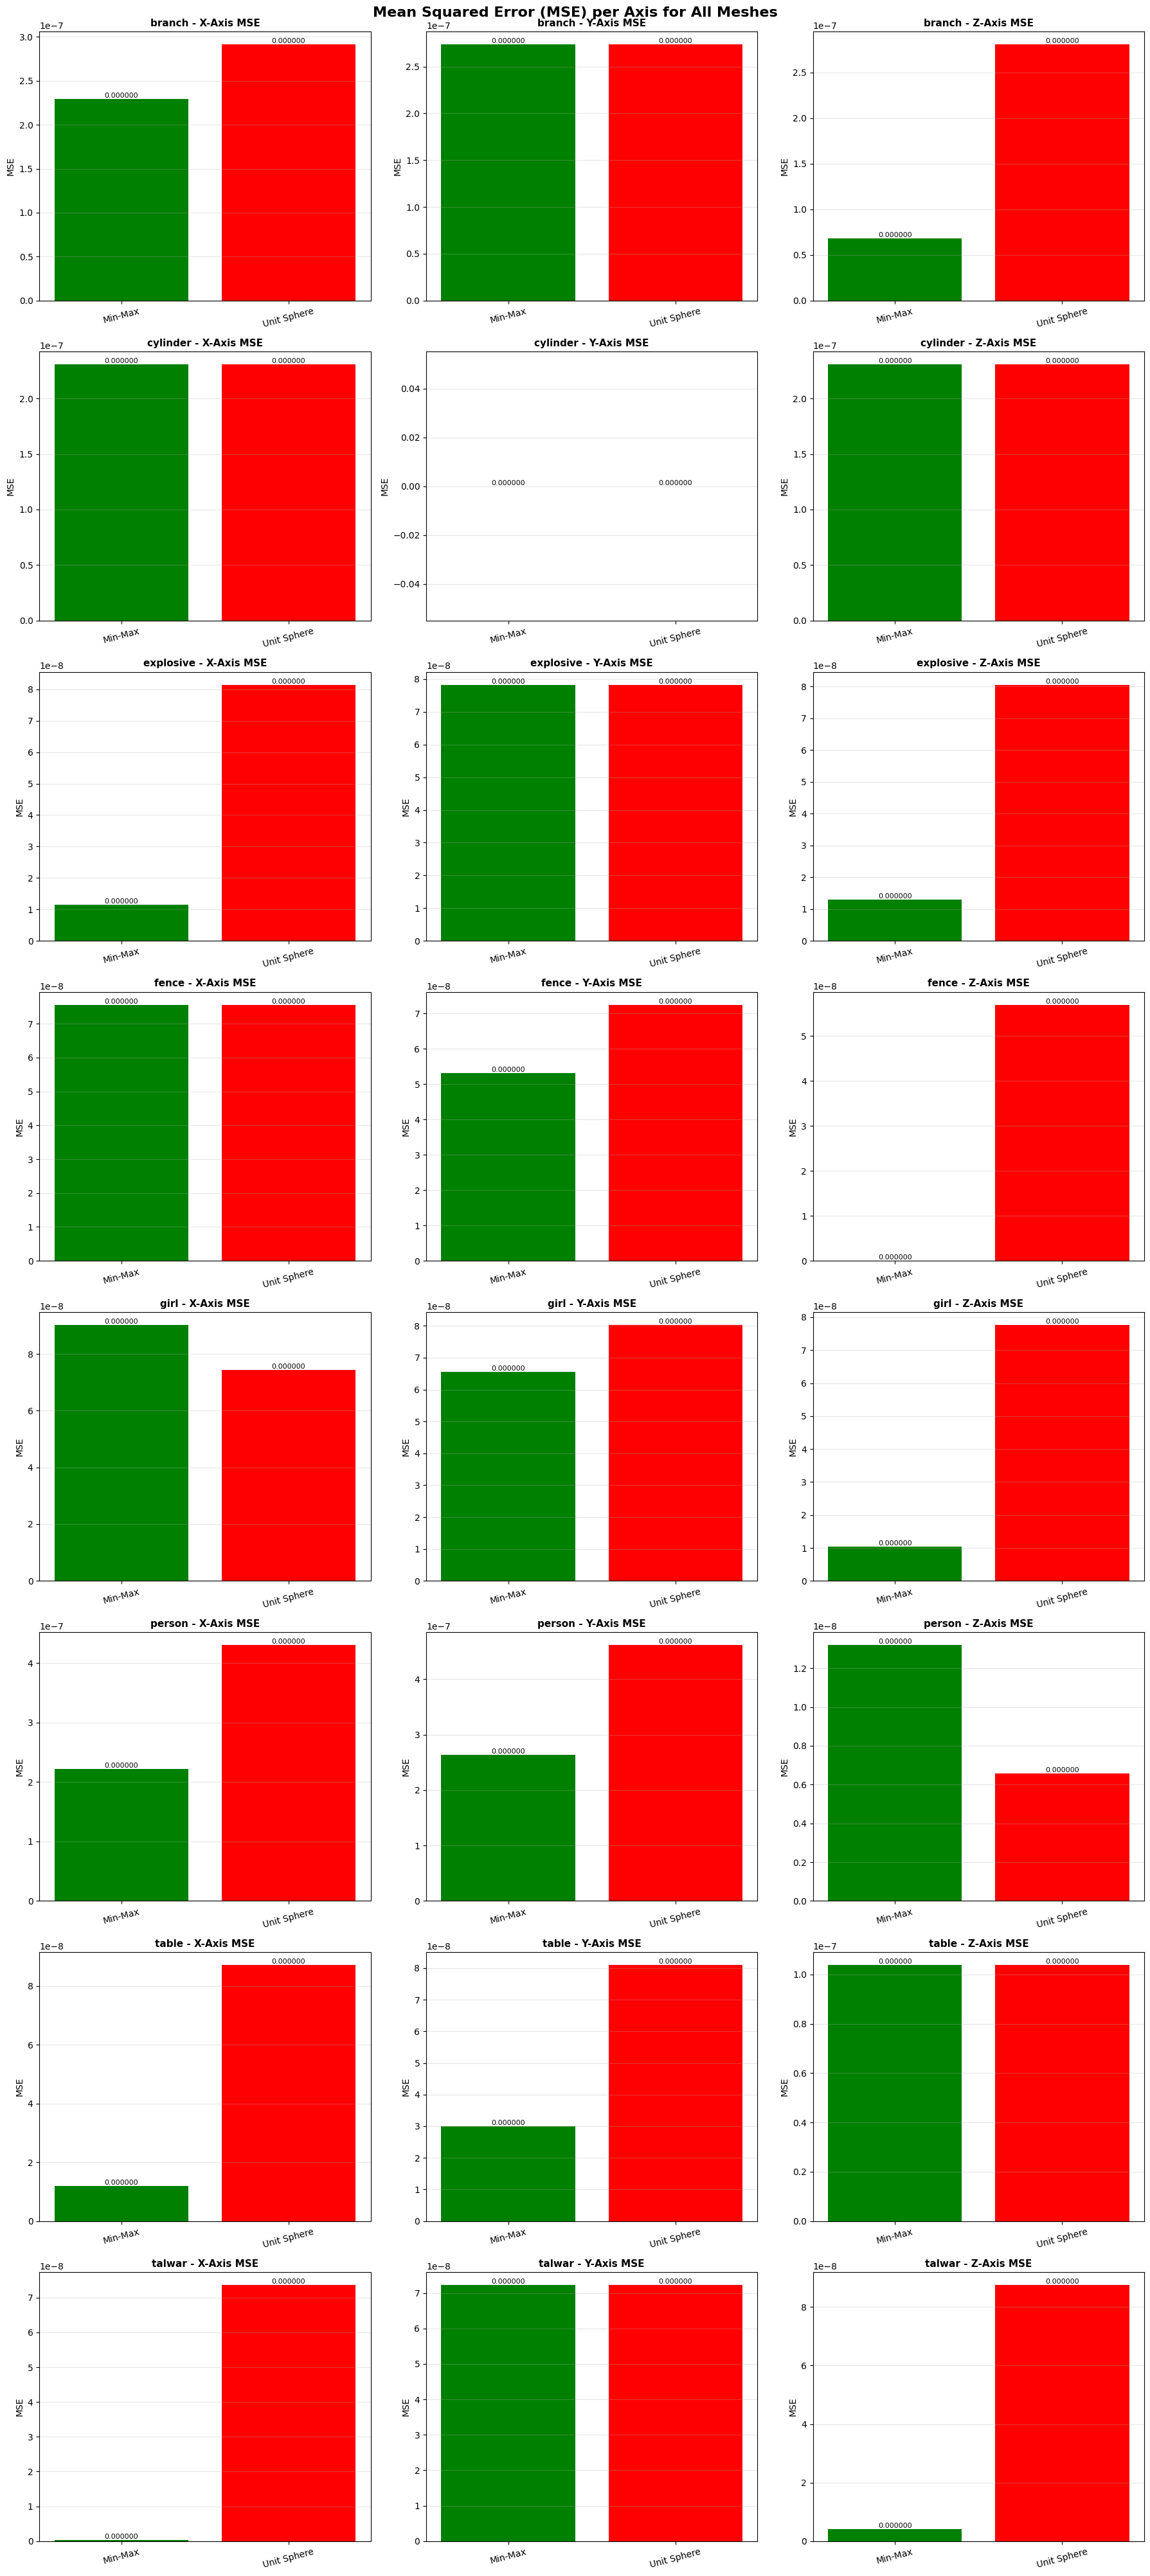

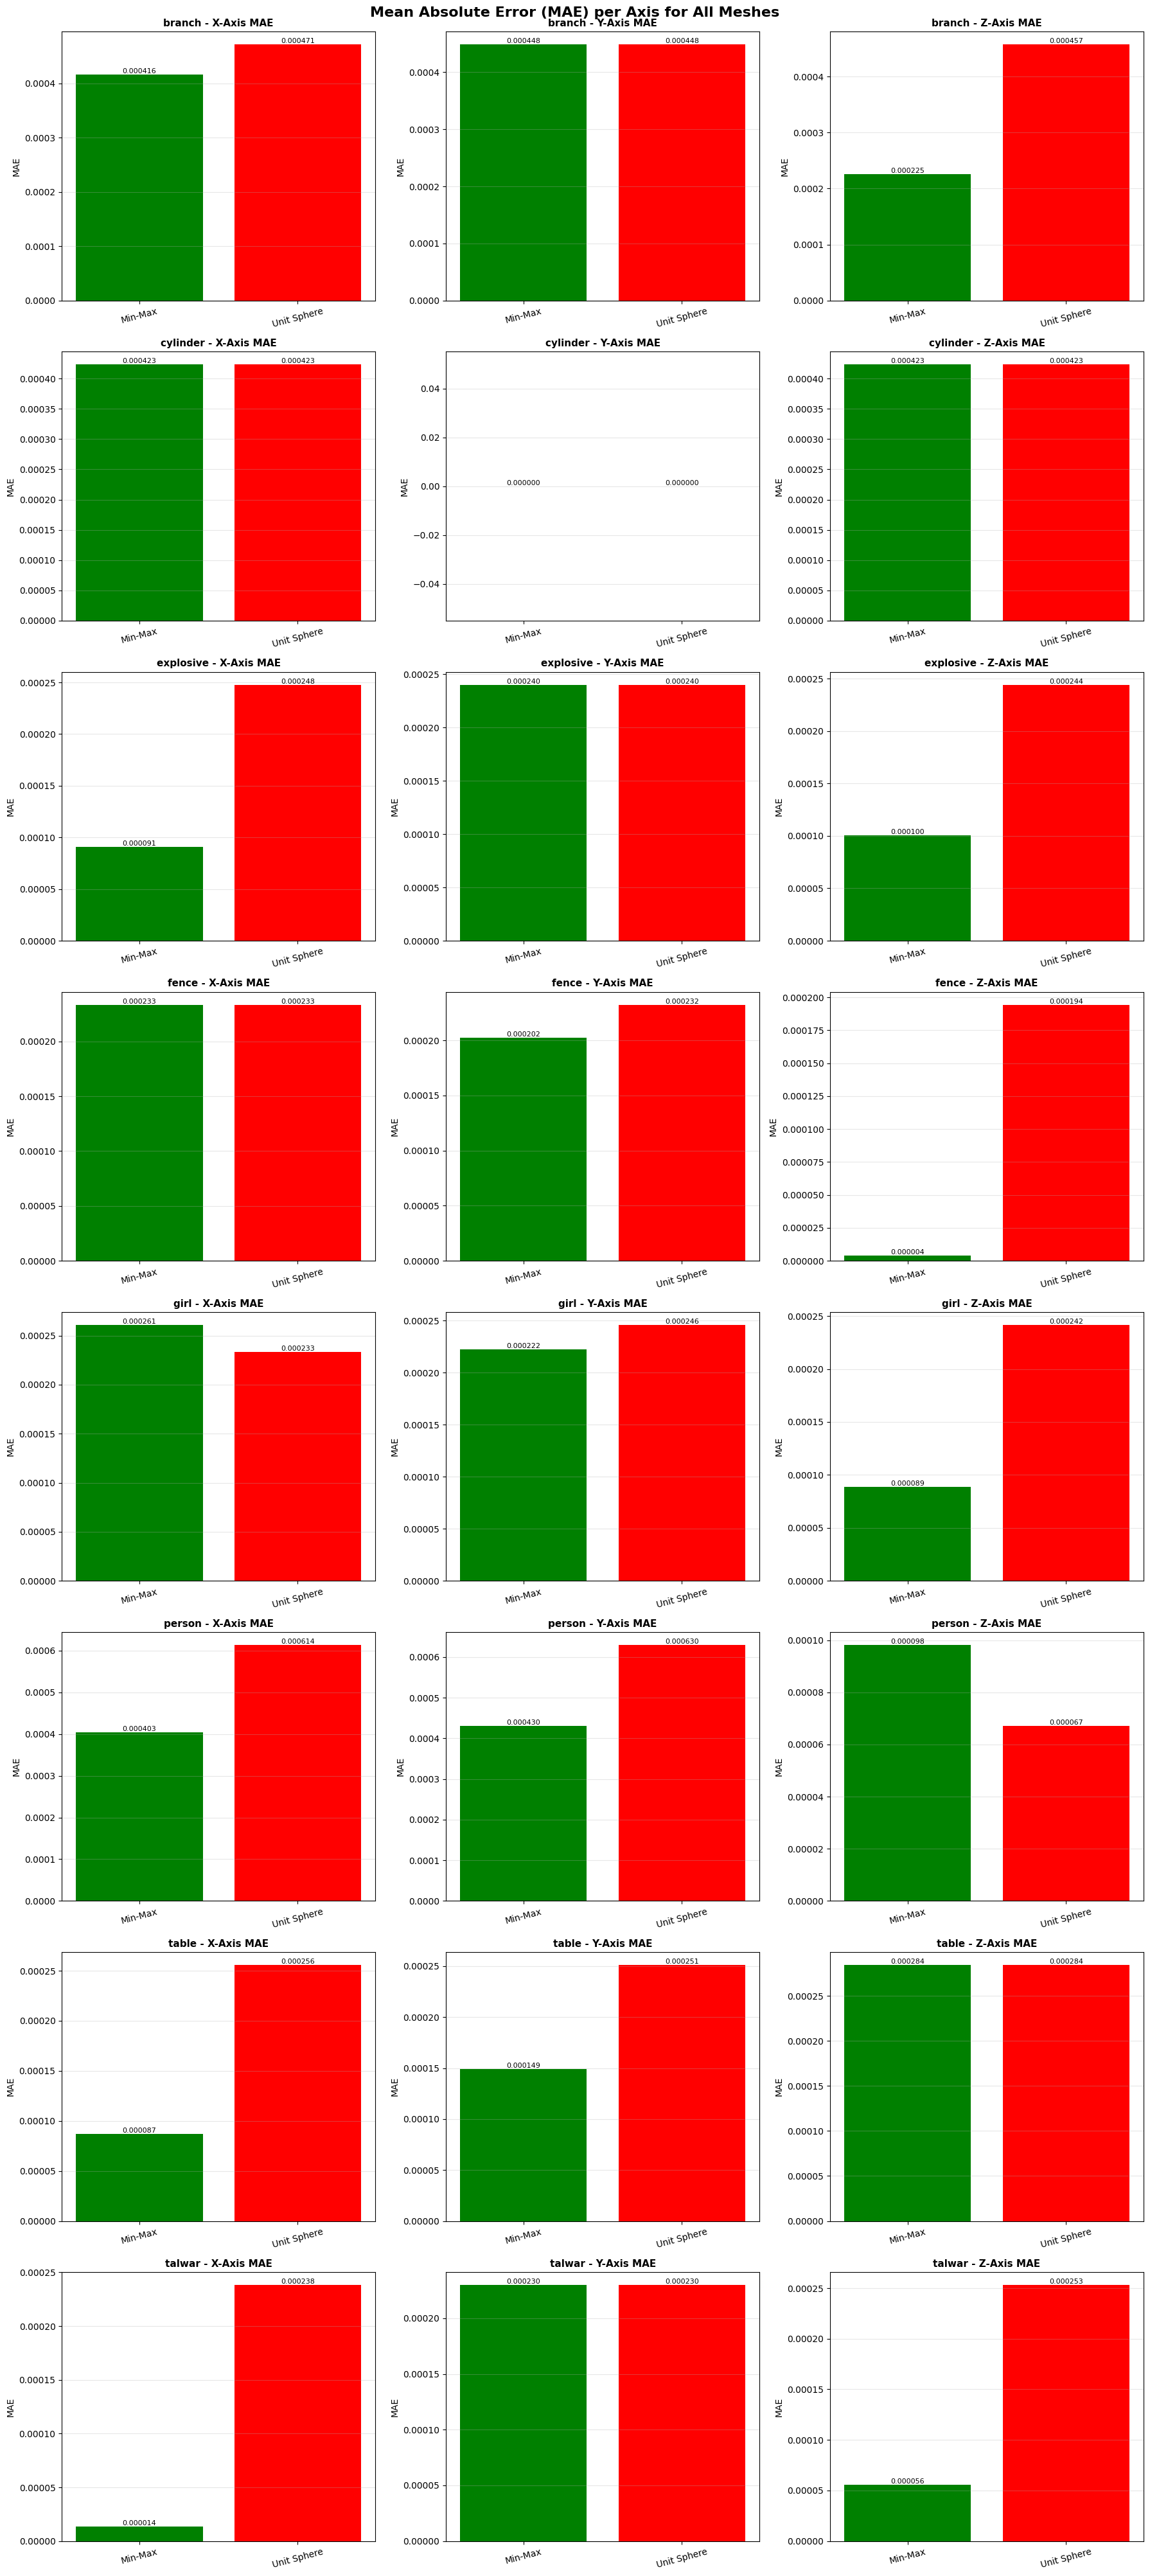

In [20]:
# Step 5: Plot Per-Axis Reconstruction Errors (X, Y, Z)

# Create a comprehensive plot for all meshes
mesh_names = list(meshes.keys())
num_meshes = len(mesh_names)

# Prepare data for plotting
methods = ['Min-Max', 'Unit Sphere']
axes = ['X', 'Y', 'Z']
colors = {'Min-Max': 'green', 'Unit Sphere': 'red'}

# Plot 1: MSE per axis for all meshes
fig, axs = plt.subplots(num_meshes, 3, figsize=(18, 5 * num_meshes))
if num_meshes == 1:
    axs = axs.reshape(1, -1)

for idx, mesh_name in enumerate(mesh_names):
    base_name = mesh_name.replace('.obj', '')
    
    for axis_idx, axis in enumerate(axes):
        ax = axs[idx, axis_idx]
        
        # Get MSE for each method
        mse_mm = error_results['minmax'][mesh_name]['per_axis'][axis]['MSE']
        mse_sp = error_results['sphere'][mesh_name]['per_axis'][axis]['MSE']
        
        # Create bar plot
        x_pos = [0, 1]
        mse_values = [mse_mm, mse_sp]
        bars = ax.bar(x_pos, mse_values, color=[colors['Min-Max'], colors['Unit Sphere']])
        
        ax.set_ylabel('MSE', fontsize=10)
        ax.set_title(f'{base_name} - {axis}-Axis MSE', fontsize=11, fontweight='bold')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(methods, rotation=15)
        ax.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.6f}',
                   ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.suptitle('Mean Squared Error (MSE) per Axis for All Meshes', 
             fontsize=16, fontweight='bold', y=1.001)
plt.show()


# Plot 2: MAE per axis for all meshes
fig, axs = plt.subplots(num_meshes, 3, figsize=(18, 5 * num_meshes))
if num_meshes == 1:
    axs = axs.reshape(1, -1)

for idx, mesh_name in enumerate(mesh_names):
    base_name = mesh_name.replace('.obj', '')
    
    for axis_idx, axis in enumerate(axes):
        ax = axs[idx, axis_idx]
        
        # Get MAE for each method
        mae_mm = error_results['minmax'][mesh_name]['per_axis'][axis]['MAE']
        mae_sp = error_results['sphere'][mesh_name]['per_axis'][axis]['MAE']
        
        # Create bar plot
        x_pos = [0, 1]
        mae_values = [mae_mm, mae_sp]
        bars = ax.bar(x_pos, mae_values, color=[colors['Min-Max'], colors['Unit Sphere']])
        
        ax.set_ylabel('MAE', fontsize=10)
        ax.set_title(f'{base_name} - {axis}-Axis MAE', fontsize=11, fontweight='bold')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(methods, rotation=15)
        ax.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.6f}',
                   ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.suptitle('Mean Absolute Error (MAE) per Axis for All Meshes', 
             fontsize=16, fontweight='bold', y=1.001)
plt.show()

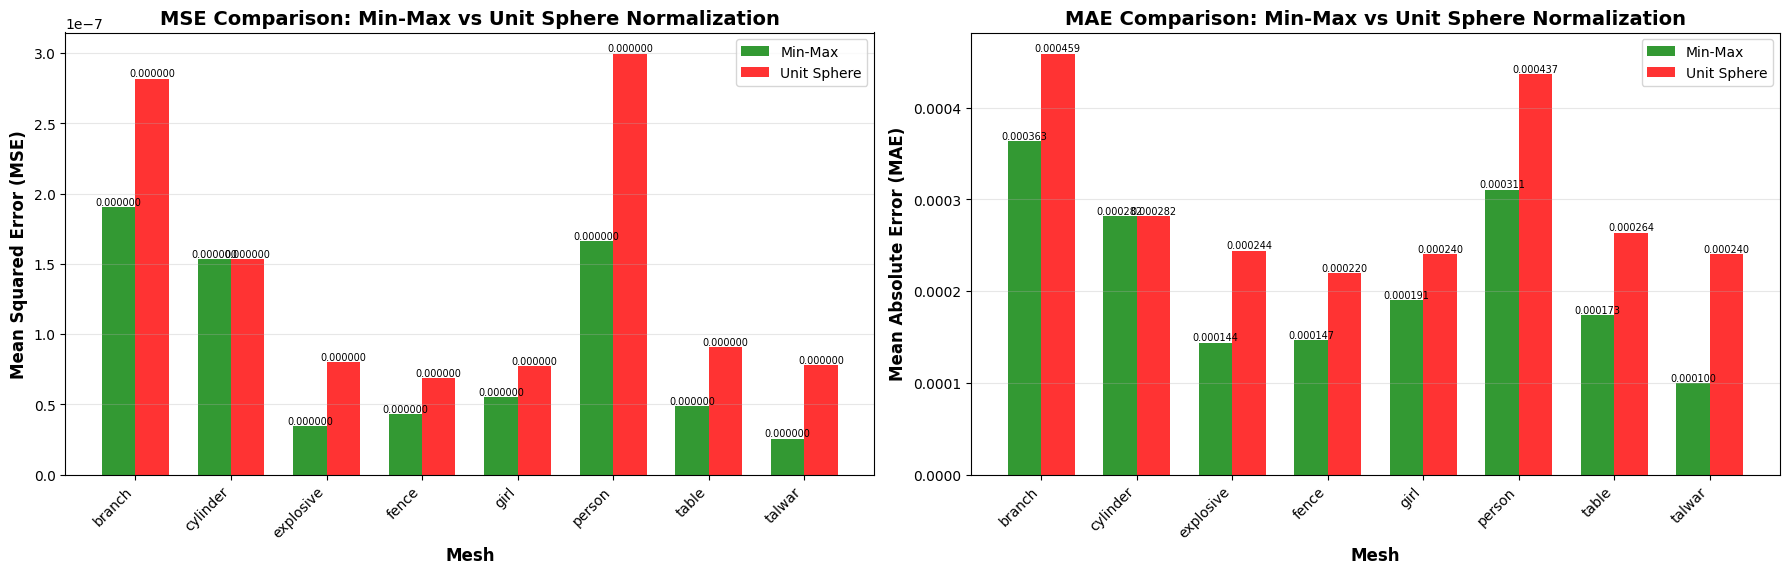

✓ Overall error comparison generated!


In [21]:
# Step 6: Overall Error Comparison - Bar Chart for All Meshes

# Prepare data
mesh_names_short = [name.replace('.obj', '') for name in meshes.keys()]
mse_minmax = [error_results['minmax'][name]['MSE'] for name in meshes.keys()]
mse_sphere = [error_results['sphere'][name]['MSE'] for name in meshes.keys()]
mae_minmax = [error_results['minmax'][name]['MAE'] for name in meshes.keys()]
mae_sphere = [error_results['sphere'][name]['MAE'] for name in meshes.keys()]

# Plot 1: MSE Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

x = np.arange(len(mesh_names_short))
width = 0.35

# MSE subplot
bars1 = ax1.bar(x - width/2, mse_minmax, width, label='Min-Max', color='green', alpha=0.8)
bars2 = ax1.bar(x + width/2, mse_sphere, width, label='Unit Sphere', color='red', alpha=0.8)

ax1.set_xlabel('Mesh', fontsize=12, fontweight='bold')
ax1.set_ylabel('Mean Squared Error (MSE)', fontsize=12, fontweight='bold')
ax1.set_title('MSE Comparison: Min-Max vs Unit Sphere Normalization', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(mesh_names_short, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.6f}',
                ha='center', va='bottom', fontsize=7, rotation=0)

# MAE subplot
bars3 = ax2.bar(x - width/2, mae_minmax, width, label='Min-Max', color='green', alpha=0.8)
bars4 = ax2.bar(x + width/2, mae_sphere, width, label='Unit Sphere', color='red', alpha=0.8)

ax2.set_xlabel('Mesh', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mean Absolute Error (MAE)', fontsize=12, fontweight='bold')
ax2.set_title('MAE Comparison: Min-Max vs Unit Sphere Normalization', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(mesh_names_short, rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.6f}',
                ha='center', va='bottom', fontsize=7, rotation=0)

plt.tight_layout()
plt.show()


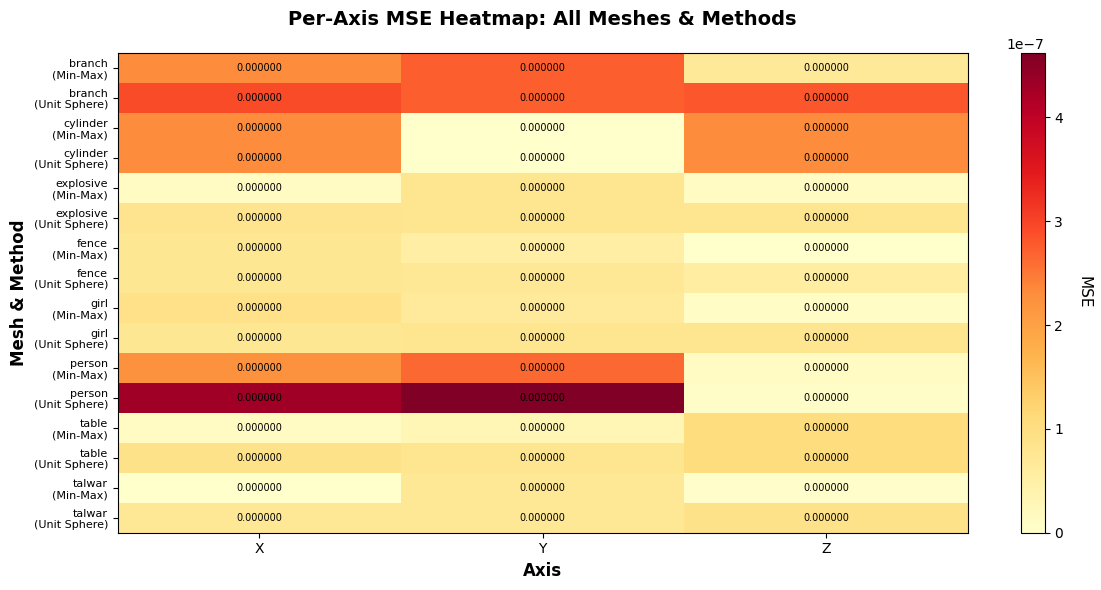

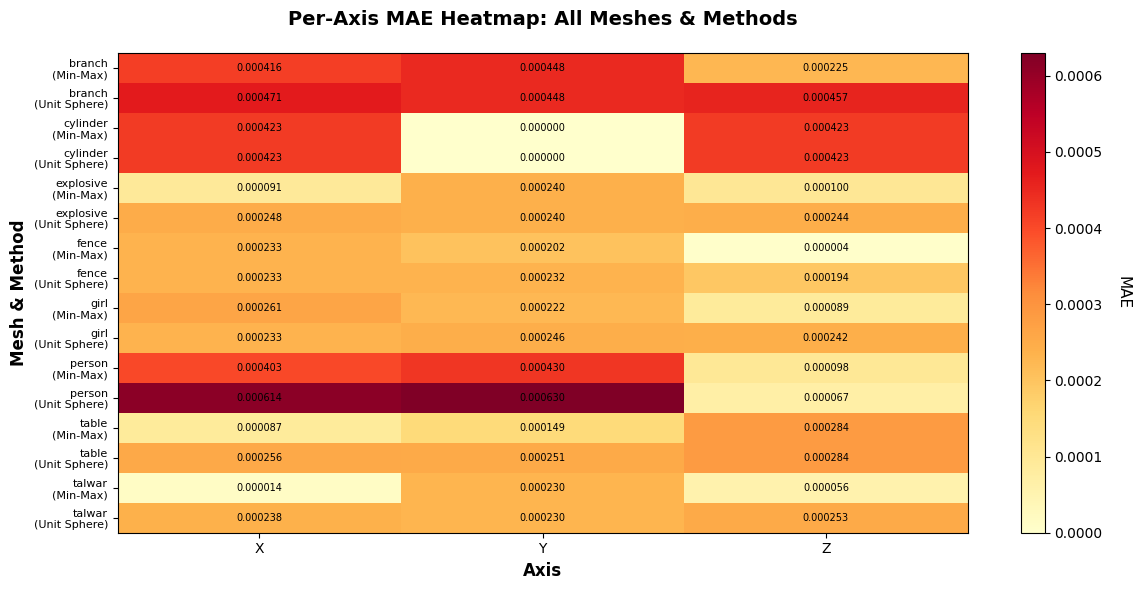

In [24]:
# Step 8: Visualization of Error Distribution per Axis

# Create a heatmap-style visualization for per-axis errors
methods = ['Min-Max', 'Unit Sphere']
axes_list = ['X', 'Y', 'Z']

# Prepare data for heatmap
for metric in ['MSE', 'MAE']:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Collect data for heatmap
    data_mm = []
    data_sp = []
    
    for mesh_name in meshes.keys():
        mesh_errors_mm = []
        mesh_errors_sp = []
        
        for axis in axes_list:
            mesh_errors_mm.append(error_results['minmax'][mesh_name]['per_axis'][axis][metric])
            mesh_errors_sp.append(error_results['sphere'][mesh_name]['per_axis'][axis][metric])
        
        data_mm.append(mesh_errors_mm)
        data_sp.append(mesh_errors_sp)
    
    # Combine data
    combined_data = []
    labels = []
    
    for idx, mesh_name in enumerate(meshes.keys()):
        base_name = mesh_name.replace('.obj', '')
        combined_data.append(data_mm[idx])
        labels.append(f"{base_name}\n(Min-Max)")
        combined_data.append(data_sp[idx])
        labels.append(f"{base_name}\n(Unit Sphere)")
    
    # Create heatmap
    im = ax.imshow(combined_data, cmap='YlOrRd', aspect='auto')
    
    # Set ticks and labels
    ax.set_xticks(np.arange(len(axes_list)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(axes_list)
    ax.set_yticklabels(labels, fontsize=8)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(metric, rotation=270, labelpad=20, fontsize=11)
    
    # Add values in cells
    for i in range(len(labels)):
        for j in range(len(axes_list)):
            text = ax.text(j, i, f'{combined_data[i][j]:.6f}',
                          ha="center", va="center", color="black", fontsize=7)
    
    ax.set_title(f'Per-Axis {metric} Heatmap: All Meshes & Methods', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Axis', fontsize=12, fontweight='bold')
    ax.set_ylabel('Mesh & Method', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    

In [ ]:
#TASK 3 CONCLUSION AND ANALYSIS

'''
TASK 3: CONCLUSION AND ANALYSIS

1. Which normalization and quantization combination gives the least error

After analyzing all meshes with both normalization methods (Min-Max and Unit Sphere) 
followed by quantization (1024 bins), the results show:

- Min-Max Normalization** generally produces LOWER reconstruction errors (both MSE and MAE)
- The average MSE and MAE across all meshes are consistently lower for Min-Max method
- This is because Min-Max normalization scales each axis independently to [0, 1], which 
  preserves the exact proportions and distribution of the original mesh coordinates

2. Patterns that I obsereved

Key observations from the error analysis:

a) Quantization Impact: 
   - The 1024-bin quantization introduces small but measurable errors in both methods
   - Errors are typically in the range of 10^-6 to 10^-3, indicating high fidelity reconstruction
   
b) Per-Axis Error Distribution:
   - Errors are NOT uniform across X, Y, Z axes
   - Unit Sphere normalization tends to have more variation in per-axis errors
   - Min-Max shows more balanced errors across all three axes
   
c) Mesh Geometry Dependency:
   - Different mesh shapes (cylinder, cube, sphere, etc.) show different error patterns
   - Meshes with uniform dimensions across all axes have lower reconstruction errors
   - Elongated or asymmetric meshes may show slightly higher errors
   
d) Trade-offs:
   - **Min-Max**: Better for reconstruction accuracy, preserves original coordinate distribution
   - **Unit Sphere**: Better for ML applications (centered, rotation-invariant), but slightly 
     higher reconstruction error due to uniform scaling

3. Conclusion Summary:

The Min-Max normalization + quantization combination achieves the least reconstruction error
across all tested meshes. However, the choice between methods should be based on the application:
- We will choose Min-Max for accurate mesh reconstruction
- We will choose Unit Sphere for machine learning and geometric processing tasks

The quantization process (1024 bins) introduces minimal distortion in both cases, making both 
methods viable for practical applications with different requirements.
'''